In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [77]:
print(tf. __version__)

2.19.0


In [78]:
dataset_path = "dataset"

✅ Found 3 categories: ['Pepper_bell_Bacterial_spot', 'Potato_Late_blight', 'Tomato_Bacterial_spot']


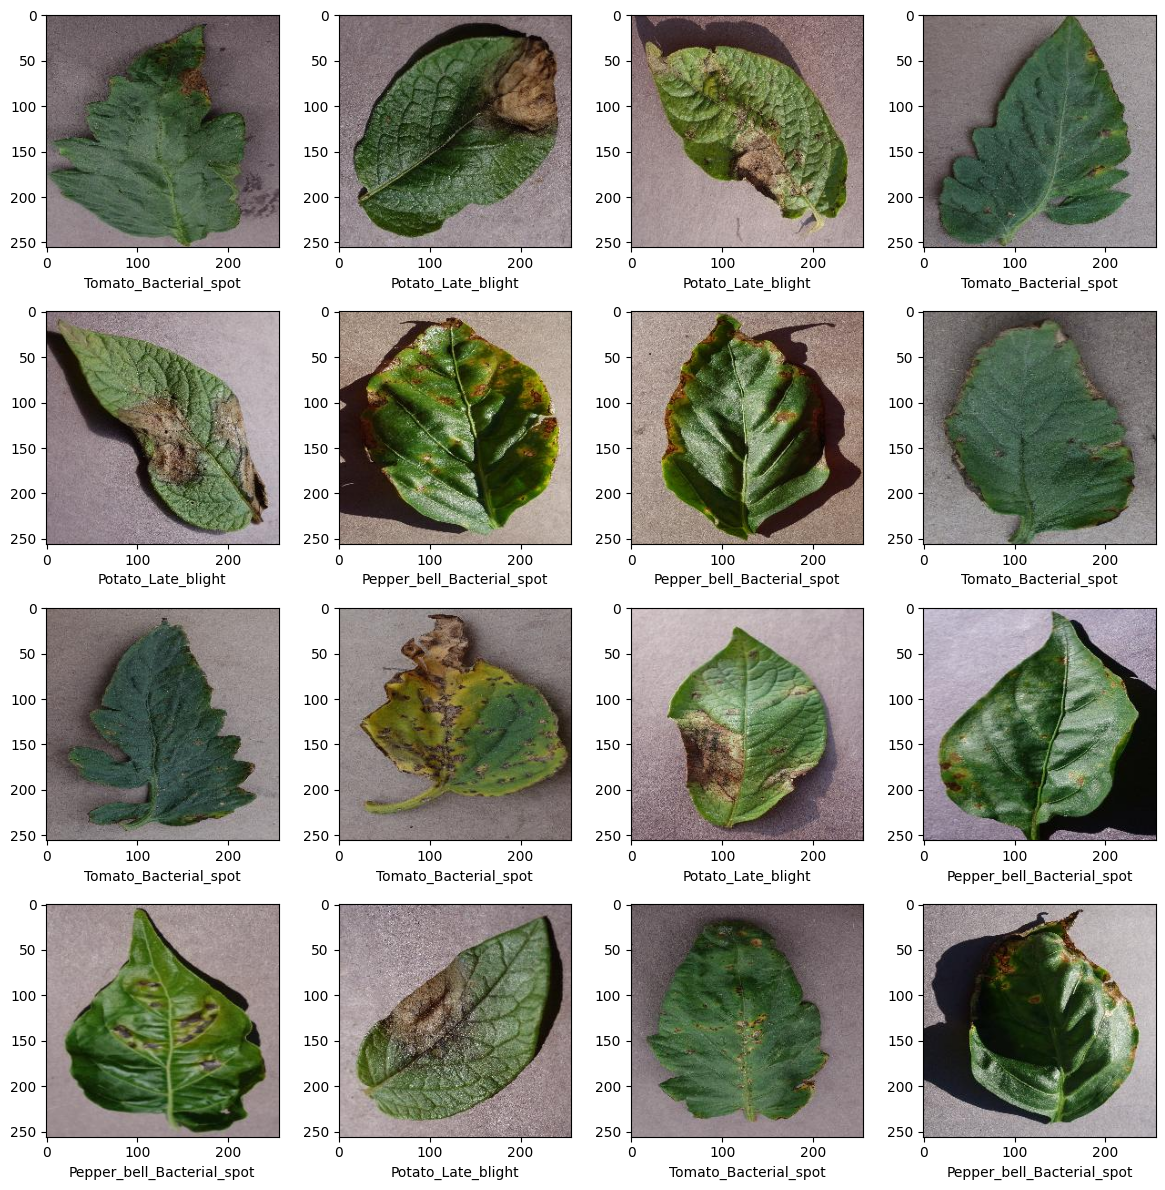

In [79]:
# Ensure dataset exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"❌ Dataset path '{dataset_path}' not found!")

# Get all category folders inside 'dataset/'
categories = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

if not categories:
    raise ValueError("❌ No category folders found! Ensure 'dataset/' contains subdirectories with images.")

print(f"✅ Found {len(categories)} categories: {categories}")

# Plot 16 images from random categories
plt.figure(figsize=(12, 12))

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()

    # Select a random category
    random_category = random.choice(categories)
    category_path = os.path.join(dataset_path, random_category)

    # Get image files (filter out non-image files)
    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    if image_files:
        random_image = random.choice(image_files)
        img_path = os.path.join(category_path, random_image)

        # Read and display the image
        rand_img = imread(img_path)
        plt.imshow(rand_img)
        plt.axis("on")  # Hide axis
        plt.xlabel(random_category, fontsize=10)  # Label with category name
    else:
        print(f"⚠️ No images found in '{category_path}', skipping.")

plt.show()

In [80]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256, 256))  
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [81]:
labels = os.listdir(dataset_path)

print(labels)

['Pepper_bell_Bacterial_spot', 'Potato_Late_blight', 'Tomato_Bacterial_spot']


In [82]:
dataset_path = "dataset"
root_dir = listdir(dataset_path)
image_list, label_list = [], []
all_labels = ['Pepper_bell_Bacterial_spot', 'Potato_Late_blight', 'Tomato_Bacterial_spot']
binary_labels = [0, 1, 2]
temp = -1

# Reading and converting image to numpy array

for directory in root_dir:
  plant_image_list = listdir(f"{dataset_path}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dataset_path}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [83]:
# Visualize the number of classes count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0
0    300
1    300
2    300
Name: count, dtype: int64

In [84]:
# Next we will observe the shape of the image.

image_list[0].shape

(256, 256, 3)

In [85]:
# Checking the total number of the images which is the length of the labels list.

label_list = np.array(label_list)
label_list.shape

(900,)

In [86]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 


In [87]:
# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

In [88]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [93]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [94]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])


In [95]:
# Splitting the training data set into training and validation data sets

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [96]:
# Training the model

epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 988ms/step - accuracy: 0.3529 - loss: 1.7230 - val_accuracy: 0.2672 - val_loss: 1.1236
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 882ms/step - accuracy: 0.3262 - loss: 1.1263 - val_accuracy: 0.2672 - val_loss: 1.1174
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 887ms/step - accuracy: 0.3720 - loss: 1.1011 - val_accuracy: 0.3966 - val_loss: 1.0767
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 860ms/step - accuracy: 0.4202 - loss: 1.0548 - val_accuracy: 0.5431 - val_loss: 1.0212
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 861ms/step - accuracy: 0.5949 - loss: 1.0239 - val_accuracy: 0.4138 - val_loss: 1.0367
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 873ms/step - accuracy: 0.4744 - loss: 0.9925 - val_accuracy: 0.5000 - val_loss: 0.9629
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 862ms/step - accuracy: 0.4619 - loss: 0.9788 - val_accuracy: 0.5948 - val_loss: 0.9604
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 863ms/step - accuracy: 0.5574 - loss: 0.9503 - val_accuracy: 0.6466 - val_loss:

In [97]:
model.save("plant1_disease_model.h5")


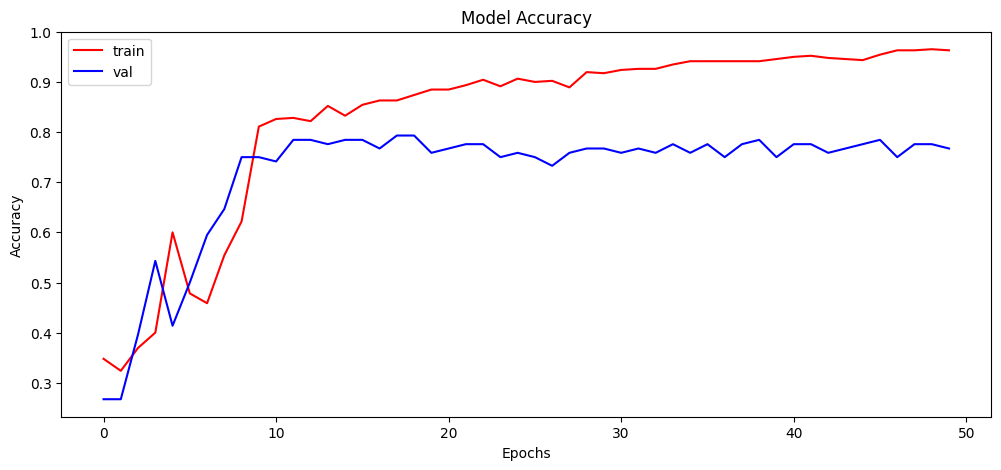

In [98]:
# Plot the training history

plt.figure(figsize = (12, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [99]:
print("Calculating model accuracy")

scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100}")

Calculating model accuracy
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8415 - loss: 0.4009
Test Accuracy: 82.77778029441833


In [100]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


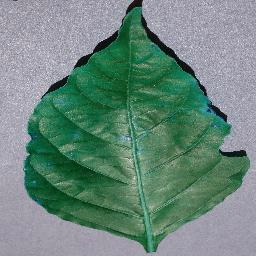

In [101]:
# Plotting image to compare

img = array_to_img(x_test[11])
img

In [102]:
# Finding max value from predition list and comaparing original value vs predicted

print("Originally : ", all_labels[np.argmax(y_test[11])])
print("Predicted : ", all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Originally :  Pepper_bell_Bacterial_spot
Predicted :  Pepper_bell_Bacterial_spot
[0.04420087 0.03204757 0.92375153]


In [103]:
for i in range(50):
    print (all_labels[np.argmax(y_test[i])], " ", all_labels[np.argmax(y_pred [1])])

Potato_Late_blight   Pepper_bell_Bacterial_spot
Pepper_bell_Bacterial_spot   Pepper_bell_Bacterial_spot
Tomato_Bacterial_spot   Pepper_bell_Bacterial_spot
Pepper_bell_Bacterial_spot   Pepper_bell_Bacterial_spot
Pepper_bell_Bacterial_spot   Pepper_bell_Bacterial_spot
Tomato_Bacterial_spot   Pepper_bell_Bacterial_spot
Pepper_bell_Bacterial_spot   Pepper_bell_Bacterial_spot
Potato_Late_blight   Pepper_bell_Bacterial_spot
Potato_Late_blight   Pepper_bell_Bacterial_spot
Potato_Late_blight   Pepper_bell_Bacterial_spot
Potato_Late_blight   Pepper_bell_Bacterial_spot
Pepper_bell_Bacterial_spot   Pepper_bell_Bacterial_spot
Tomato_Bacterial_spot   Pepper_bell_Bacterial_spot
Tomato_Bacterial_spot   Pepper_bell_Bacterial_spot
Pepper_bell_Bacterial_spot   Pepper_bell_Bacterial_spot
Tomato_Bacterial_spot   Pepper_bell_Bacterial_spot
Pepper_bell_Bacterial_spot   Pepper_bell_Bacterial_spot
Pepper_bell_Bacterial_spot   Pepper_bell_Bacterial_spot
Tomato_Bacterial_spot   Pepper_bell_Bacterial_spot
Tomato

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


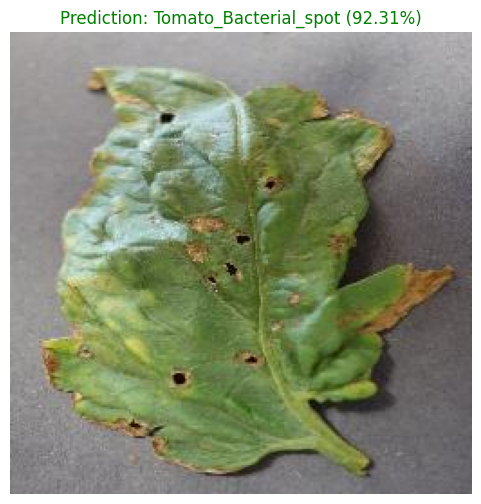


✅ Predicted Disease: **Tomato_Bacterial_spot** (92.31% confidence)


In [122]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Load trained model
model = tf.keras.models.load_model("plant_disease_model.h5")

# Class labels (update if needed)
class_labels = ['Pepper_bell_Bacterial_spot', 'Potato_Late_blight', 'Tomato_Bacterial_spot']

def predict_disease(image_path):
    if not os.path.exists(image_path):
        print(f"❌ Error: Image '{image_path}' not found.")
        return
    
    try:
        # ✅ Read and preprocess the image
        img = cv2.imread(image_path)
        if img is None:
            print("❌ Error: Unable to read image. Ensure it's a valid image file.")
            return
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
        img_resized = cv2.resize(img_rgb, (256, 256))  # ✅ Resize correctly

        # Normalize and reshape for model
        img_input = img_resized / 255.0  
        img_input = np.expand_dims(img_input, axis=0)  # ✅ Add batch dimension (1, 256, 256, 3)

        # ✅ Perform prediction
        prediction = model.predict(img_input)[0]  
        predicted_index = np.argmax(prediction)  
        predicted_class = class_labels[predicted_index]  
        confidence = prediction[predicted_index] * 100  

        # ✅ Display the image
        plt.figure(figsize=(6, 6))
        plt.imshow(img_resized)
        plt.axis("off")

        # Set title with color based on confidence
        if confidence < 50:
            title_color = "red"
            title_text = f"⚠️ Low Confidence: {predicted_class} ({confidence:.2f}%)"
        else:
            title_color = "green"
            title_text = f"Prediction: {predicted_class} ({confidence:.2f}%)"
        
        plt.title(title_text, fontsize=12, color=title_color)
        plt.show()

        print(f"\n✅ Predicted Disease: **{predicted_class}** ({confidence:.2f}% confidence)")

        # ✅ Check confidence level
        if confidence < 90:
            print("\n⚠️ Warning: Low confidence prediction. The result may not be reliable.")
            print("🔍 Consider using a clearer image or trying a different one.")

    except Exception as e:
        print(f"❌ Error: {e}")

# Test with an image
predict_disease("tbs.jpg")
